<a href="https://colab.research.google.com/github/roahalejandro/ProyectoDS_/blob/main/ProyectoDS_ParteI_Roa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Proyecto Data Science – Profesionales de Medicina en Argentina

  **1. Definición del Proyecto y Abstract (borrador inicial)**

En este proyecto exploramos la serie histórica de profesionales médicos registrados en Argentina entre 2012 y 2021, provista por el Ministerio de Salud. Este dataset permite analizar la composición del cuerpo médico, incluyendo nacionalidad, provincia de residencia, grupo etario, institución de formación y año de titulación.

El análisis busca identificar tendencias en la incorporación de profesionales, diferencias entre médicos nacidos en Argentina y en el exterior, y su distribución geográfica y etaria. Como objetivo de más largo plazo, se evaluará la posibilidad de comparar este modelo con otros países para entender la atracción o retención de talento médico.

Mediante técnicas de análisis exploratorio (EDA) y visualizaciones en Python (pandas, seaborn, matplotlib), se realizará un diagnóstico visual y cuantitativo que siente las bases para una segunda etapa de estudio comparativo o predictivo.



  **2. Preguntas / Hipótesis de interés**

¿Cuál es la evolución anual de médicos con matrícula activa en Argentina?

¿Qué proporción de médicos activos son nacidos en el exterior?

¿Cuáles son las provincias con mayor y menor densidad de médicos?

¿Hay diferencias de edad o año de titulación entre profesionales nacionales y extranjeros?

¿Qué universidades (o instituciones formadoras) concentran la mayor parte de la formación médica?

¿Se puede detectar una tendencia de dependencia de profesionales extranjeros?


**3.Carga y exploración de datos**

  - Conexión a Google Drive
  - Lectura del dataset  
  - Revisión de estructura y primeras filas  
  - Limpieza inicial de nombres de columnas  

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
ruta = "https://docs.google.com/spreadsheets/d/1r2z1_jtRrCyv6wZqbt_Go0HaxErYSWtsxOap_umhz_0/edit?usp=drive_link"


In [10]:
import pandas as pd

ruta = "/content/drive/MyDrive/CODERHOUSE/Data Science I/profesionales_de_medicina_2012_2021.csv"

df = pd.read_csv(ruta, sep=",", low_memory=False, encoding="utf-8")
df.head()

,sexo,grupo_etario,id_provincia_residencia,provincia_residencia,id_pais_nacimiento,pais_nacimiento,pais_origen,id_profesion_referencia,profesion_referencia,id_institucion_formadora,institucion_formadora,anio_titulo,total,anio_corte
0,F,80-84,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1954,1,2012
1,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1959,1,2012
2,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1963,1,2012
3,F,75-79,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1965,1,2012
4,F,70-74,2,Ciudad Autónoma de Buenos Aires,9999,Sin Datos,Sin Datos,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1967,1,2012


In [37]:
df.info(memory_usage="deep")

print("\nForma del dataset:", df.shape)

print("\nColumnas del dataset:")
print(df.columns.tolist())

df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454556 entries, 0 to 454555
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   sexo                      454556 non-null  object
 1   grupo_etario              454556 non-null  object
 2   id_provincia_residencia   454556 non-null  int64 
 3   provincia_residencia      454556 non-null  object
 4   id_pais_nacimiento        454556 non-null  int64 
 5   pais_nacimiento           454556 non-null  object
 6   pais_origen               454556 non-null  object
 7   id_profesion_referencia   454556 non-null  int64 
 8   profesion_referencia      454556 non-null  object
 9   id_institucion_formadora  454556 non-null  int64 
 10  institucion_formadora     454556 non-null  object
 11  año_titulo                454556 non-null  int64 
 12  total                     454556 non-null  int64 
 13  año_corte                 454556 non-null  int64 
 14  orig

,sexo,grupo_etario,id_provincia_residencia,provincia_residencia,id_pais_nacimiento,pais_nacimiento,pais_origen,id_profesion_referencia,profesion_referencia,id_institucion_formadora,institucion_formadora,año_titulo,total,año_corte,origen
193860,M,60-64,6,Buenos Aires,200,Argentina,Argentina,35,Médico,1407,UNIVERSIDAD LIBRE,1984,1,2016,Nacional
128097,F,35-39,2,Ciudad Autónoma de Buenos Aires,412,Francia,Extranjero,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,2014,1,2015,Extranjero
109221,M,75-79,6,Buenos Aires,417,Italia,Extranjero,35,Médico,1172,UNIVERSIDAD DE BUENOS AIRES,1967,1,2014,Extranjero
272748,F,25-29,58,Neuquén,9999,Sin Datos,Sin Datos,35,Médico,1228,UNIVERSIDAD NACIONAL DE LA RIOJA,2018,2,2018,Desconocido
411586,F,40-44,6,Buenos Aires,200,Argentina,Argentina,35,Médico,1104,UNIVERSIDAD DE MORON,2017,1,2021,Nacional


Detecto que la palabra "año", Python la escribio como "anio" debido que se reemplazan Ñ por NI para evitar problemas de codificación.


In [12]:
df = df.rename(columns={"anio_corte": "año_corte", "anio_titulo": "año_titulo"})

print(df.columns)

Index(['sexo', 'grupo_etario', 'id_provincia_residencia',
       'provincia_residencia', 'id_pais_nacimiento', 'pais_nacimiento',
       'pais_origen', 'id_profesion_referencia', 'profesion_referencia',
       'id_institucion_formadora', 'institucion_formadora', 'año_titulo',
       'total', 'año_corte'],
      dtype='object')


**4.Análisis exploratorio (EDA)**

- Valores únicos por columna  
- Porcentaje de nulos  
- Distribuciones generales  

In [13]:
print("Valores únicos por columna:\n")
for col in ["sexo", "grupo_etario", "provincia_residencia", "pais_nacimiento", "año_corte"]:
    print(f"{col}: {df[col].nunique()} valores únicos")

print("\nEjemplo de valores únicos:")
print("sexo:", df["sexo"].unique())
print("grupo_etario:", df["grupo_etario"].unique()[:10])
print("pais_nacimiento:", df["pais_nacimiento"].unique()[:10])

print("\nPorcentaje de valores nulos por columna:")
print(df.isna().mean().sort_values(ascending=False) * 100)

Valores únicos por columna:

sexo: 2 valores únicos
grupo_etario: 14 valores únicos
provincia_residencia: 24 valores únicos
pais_nacimiento: 92 valores únicos
año_corte: 10 valores únicos

Ejemplo de valores únicos:
sexo: ['F' 'M']
grupo_etario: ['80-84' '75-79' '70-74' '65-69' '60-64' '55-59' '85+' '50-54' '45-49'
 '35-39']
pais_nacimiento: ['Sin Datos' 'Argelia' 'Egipto' 'Marruecos' 'Mozambique' 'Argentina'
 'Bolivia' 'Brasil' 'Canadá' 'Colombia']

Porcentaje de valores nulos por columna:
sexo                        0.0
grupo_etario                0.0
id_provincia_residencia     0.0
provincia_residencia        0.0
id_pais_nacimiento          0.0
pais_nacimiento             0.0
pais_origen                 0.0
id_profesion_referencia     0.0
profesion_referencia        0.0
id_institucion_formadora    0.0
institucion_formadora       0.0
año_titulo                  0.0
total                       0.0
año_corte                   0.0
dtype: float64


El análisis exploratorio mostró cosas clave:

sexo: Femenino y Masculino

Grupo etario: 14 grupos

Provincia de Residencia: 24

Pais de Nacimiento: 92 países distintos (incluye "Argentina", "Sin Datos")

**5.Análisis específico según hipótesis**

 - **Distribución por nacionalidad (país de nacimiento / país de origen)**

1. Crear columna origen (Nacional / Extranjero / Desconocido)

Clasificamos la nacionalidad de los profesionales, para luego comparar entre los nacionales vs extranjeros.

2. Agrupar y analizar

Corroboramos la cantidad de profesionales inscriptos por año segun el origen del mismo.

3. Visualizacion evolución temporal

In [14]:
df["origen"] = df["pais_nacimiento"].apply(
    lambda x: "Nacional" if x.strip().lower() == "argentina"
              else "Desconocido" if x.strip().lower() in ["sin datos", "9999"]
              else "Extranjero"
)

In [15]:
conteo_origen = df.groupby(["año_corte", "origen"])["total"].sum().reset_index()
conteo_origen.head()

,año_corte,origen,total
0,2012,Desconocido,3308
1,2012,Extranjero,14593
2,2012,Nacional,185429
3,2013,Desconocido,3295
4,2013,Extranjero,15398


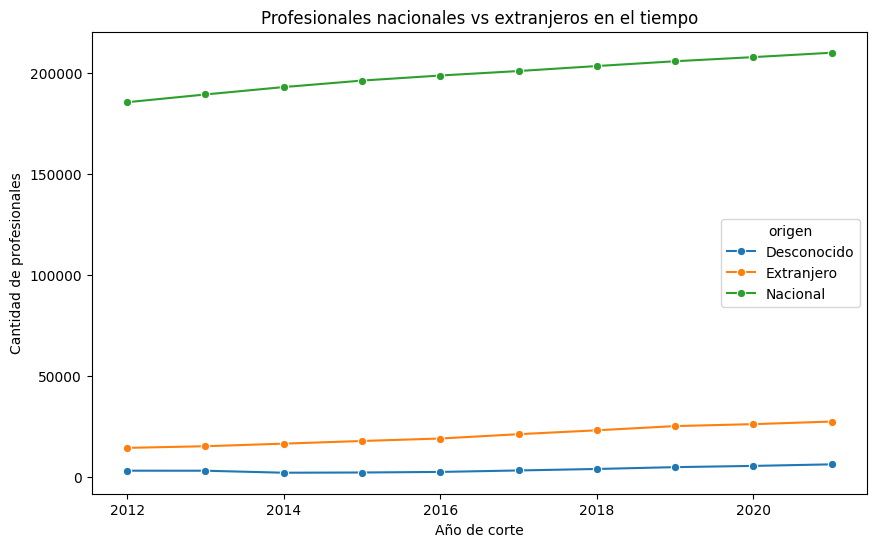

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=conteo_origen, x="año_corte", y="total", hue="origen", marker="o")
plt.title("Profesionales nacionales vs extranjeros en el tiempo")
plt.ylabel("Cantidad de profesionales")
plt.xlabel("Año de corte")
plt.show()

- **Distribución por provincia**

Se realiza el análisis para ver cómo se distribuyen los profesionales nacionales vs extranjeros en cada provincia y si existen diferencias. Acompañado de un gráfico de barras horizontales, útil para ver rápidamente en qué provincias hay mayor proporción de extranjeros.

In [21]:
conteo_provincia = (df.groupby(["provincia_residencia", "origen"])["total"]
.sum()
.reset_index()
.sort_values("total", ascending=False)
)
conteo_provincia.head()

,provincia_residencia,origen,total
2,Buenos Aires,Nacional,559061
14,Ciudad Autónoma de Buenos Aires,Nacional,498112
20,Córdoba,Nacional,189853
62,Santa Fe,Nacional,174760
13,Ciudad Autónoma de Buenos Aires,Extranjero,142248


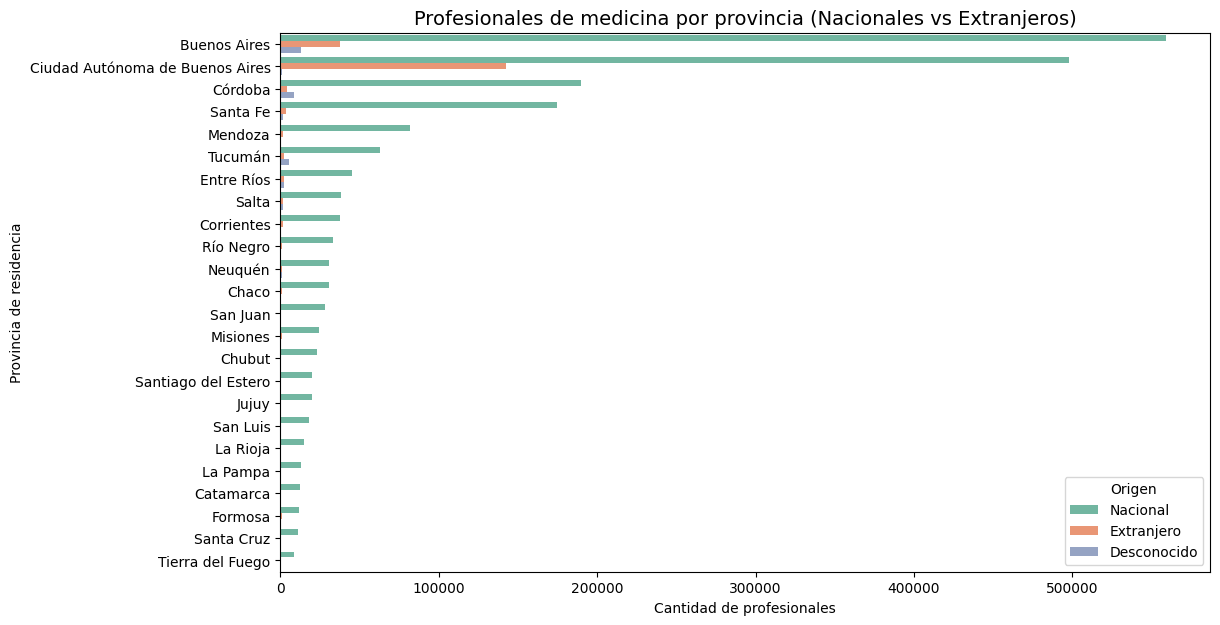

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.barplot(
    data=conteo_provincia,
    x="total",
    y="provincia_residencia",
    hue="origen",
    palette="Set2"
)
plt.title("Profesionales de medicina por provincia (Nacionales vs Extranjeros)", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Provincia de residencia")
plt.legend(title="Origen")
plt.show()

- **Ranking de Provincias con mayor % de Extranjeros**

Se realiza un Top 10 de provincias con mayor proporción de extranjeros.

Para lo cual primero procedemos a obtener columnas Nacional / Extranjero, calcular el porcentaje de extranjeros por provincia y ordenar de mayor a menor.

In [24]:
conteo_pct = (
    conteo_provincia
    .pivot(index="provincia_residencia", columns="origen", values="total")
    .fillna(0)
)

conteo_pct["%_extranjeros"] = (
    (conteo_pct["Extranjero"] / conteo_pct.sum(axis=1) * 100).round(2)
)

conteo_pct = conteo_pct.sort_values("%_extranjeros", ascending=False)
conteo_pct.head(10)

origen,Desconocido,Extranjero,Nacional,%_extranjeros
provincia_residencia,,,,
Ciudad Autónoma de Buenos Aires,1365,142248,498112,22.17
Formosa,33,1263,11737,9.69
Buenos Aires,12807,37576,559061,6.17
Tierra del Fuego,51,472,8914,5.00
Santa Cruz,97,586,11261,4.91
Misiones,439,1135,24426,4.37
Entre Ríos,2648,2049,45508,4.08
Corrientes,112,1583,37681,4.02
Salta,1792,1598,38337,3.83


/tmp/ipython-input-3484639256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


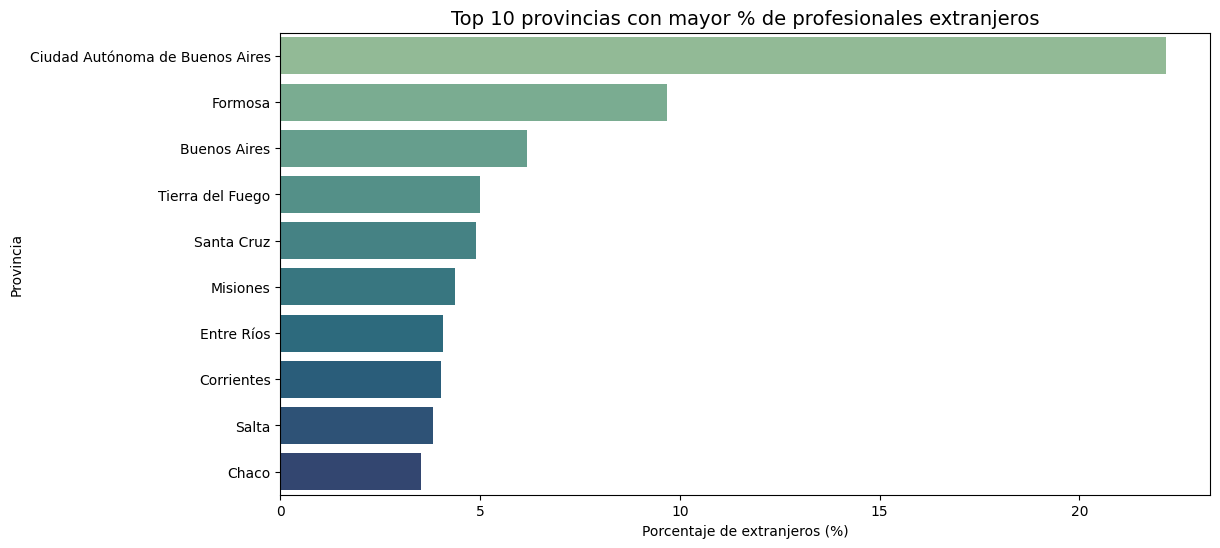

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo_pct.reset_index().head(10),
    x="%_extranjeros",
    y="provincia_residencia",
    palette="crest"
)
plt.title("Top 10 provincias con mayor % de profesionales extranjeros", fontsize=14)
plt.xlabel("Porcentaje de extranjeros (%)")
plt.ylabel("Provincia")
plt.show()

-  **Evolucion proporción de profesionales extranjeros a lo largo del tiempo (2012–2021)**

Esto busca mostrar si la dependencia de médicos extranjeros en Argentina aumentó, se mantuvo o disminuyó a lo largo de los años de analisis.

Se agrupa por año de corte y origen, calculando % de extranjero para una mayor claritud.

In [26]:
conteo_anual = (
    df.groupby(["año_corte", "origen"])["total"]
    .sum()
    .reset_index()
    .pivot(index="año_corte", columns="origen", values="total")
    .fillna(0)
)

conteo_anual["%_extranjeros"] = (conteo_anual["Extranjero"] / conteo_anual.sum(axis=1) * 100).round(2)

conteo_anual.head()

origen,Desconocido,Extranjero,Nacional,%_extranjeros
año_corte,,,,
2012,3308,14593,185429,7.18
2013,3295,15398,189264,7.40
2014,2306,16677,192919,7.87
2015,2415,17995,196123,8.31
2016,2700,19213,198626,8.71


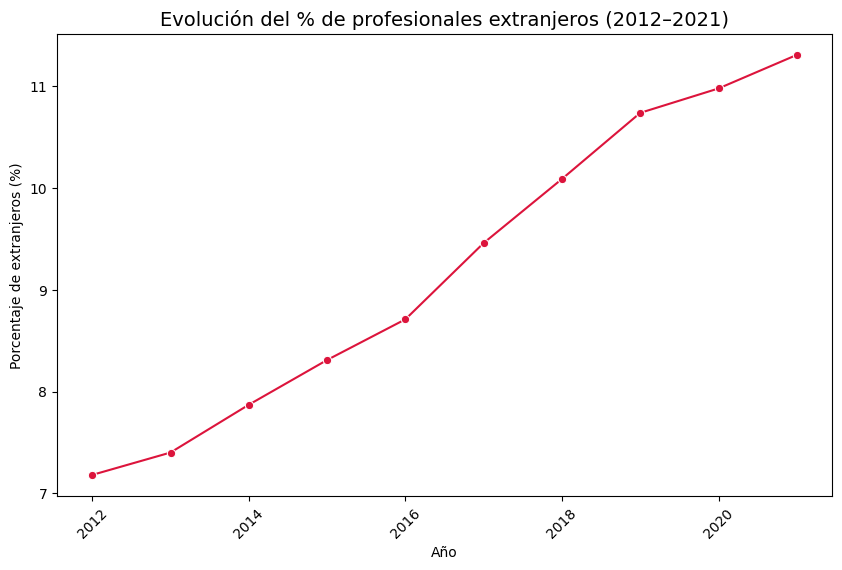

In [27]:
plt.figure(figsize=(10,6))
sns.lineplot(
    data=conteo_anual.reset_index(),
    x="año_corte",
    y="%_extranjeros",
    marker="o",
    color="crimson"
)
plt.title("Evolución del % de profesionales extranjeros (2012–2021)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Porcentaje de extranjeros (%)")
plt.xticks(rotation=45)
plt.show()

- **Composición etaria entre médicos nacionales y extranjeros**

Esto nos dará una idea de si los extranjeros tienden a ser más jóvenes, mayores, recién graduados, etc.

In [28]:
conteo_edad = (
    df.groupby(["grupo_etario", "origen"])["total"]
    .sum()
    .reset_index()
    .sort_values("grupo_etario")
)
conteo_edad.head()

,grupo_etario,origen,total
0,20-24,Desconocido,1406
1,20-24,Extranjero,676
2,20-24,Nacional,8063
3,25-29,Desconocido,8693
4,25-29,Extranjero,16448


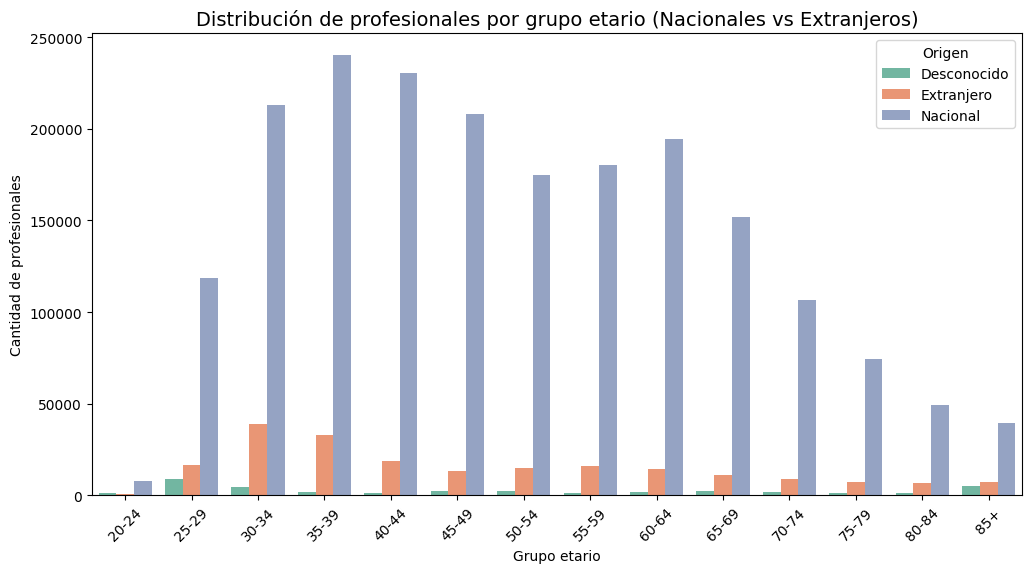

In [29]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=conteo_edad,
    x="grupo_etario",
    y="total",
    hue="origen",
    palette="Set2"
)
plt.title("Distribución de profesionales por grupo etario (Nacionales vs Extranjeros)", fontsize=14)
plt.xlabel("Grupo etario")
plt.ylabel("Cantidad de profesionales")
plt.xticks(rotation=45)
plt.legend(title="Origen")
plt.show()

- **Top 10 universidades/instituciones formadoras**

Poder identificar que instituciones formadoras concentran más médicos, y si hay diferencias entre nacionales y extranjeros.

1. Ranking general de universidades/instituciones que más médicos aportan.

2. La comparación Nacionales vs Extranjeros.

/tmp/ipython-input-780417274.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


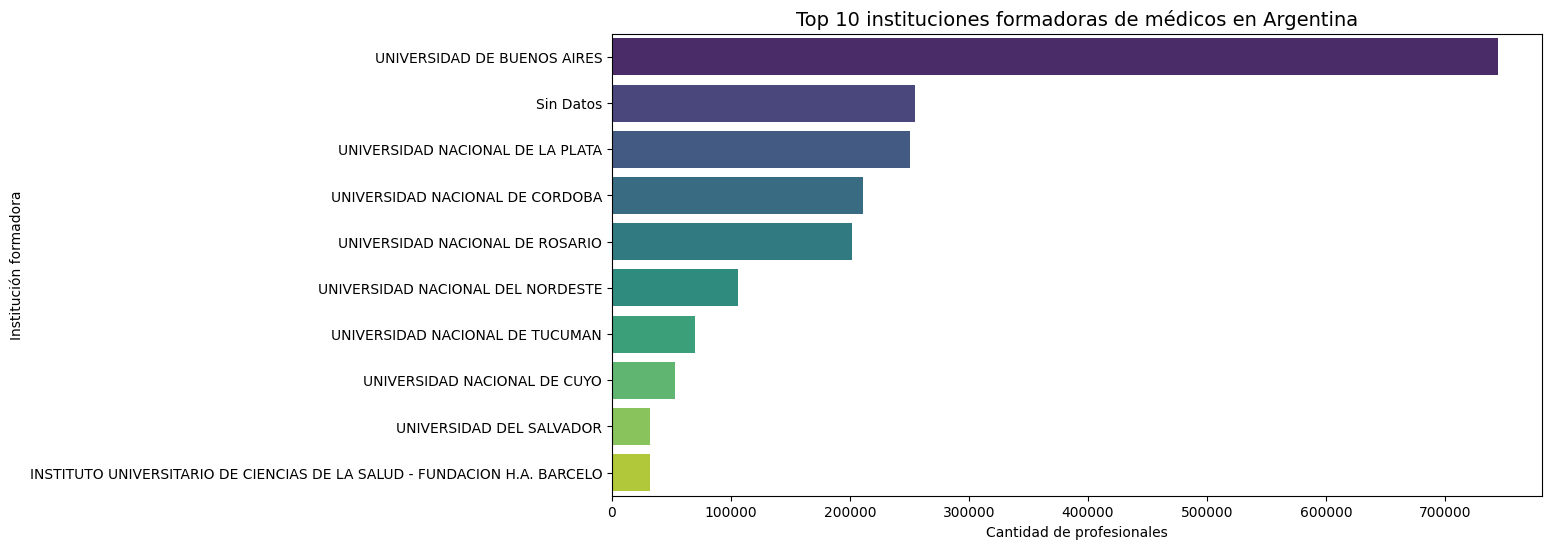

In [30]:
top_instituciones = (
    df.groupby("institucion_formadora")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_instituciones,
    x="total",
    y="institucion_formadora",
    palette="viridis"
)
plt.title("Top 10 instituciones formadoras de médicos en Argentina", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Institución formadora")
plt.show()

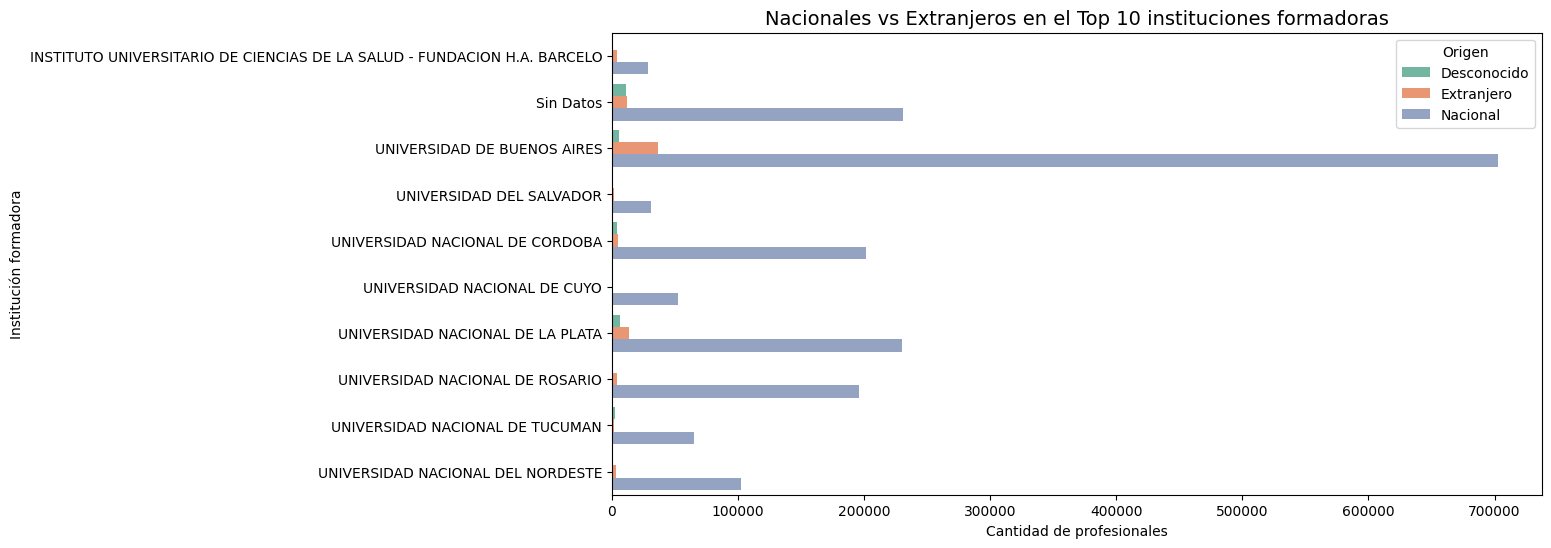

In [31]:
top_inst_origen = (
    df.groupby(["institucion_formadora", "origen"])["total"]
    .sum()
    .reset_index()
)

top10_names = top_instituciones["institucion_formadora"].tolist()
top_inst_origen = top_inst_origen[top_inst_origen["institucion_formadora"].isin(top10_names)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_inst_origen,
    x="total",
    y="institucion_formadora",
    hue="origen",
    palette="Set2"
)
plt.title("Nacionales vs Extranjeros en el Top 10 instituciones formadoras", fontsize=14)
plt.xlabel("Cantidad de profesionales")
plt.ylabel("Institución formadora")
plt.legend(title="Origen")
plt.show()

- **Análisis temporal (años de titulación)**
     - Boxplot e identificación de outliers con IQR (Interquartile Range)

Se trabaja con los años y para aplicar un análisis con **IQR**  para detectar si existen **outliers** (años atípicos en la titulación de médicos).

Teniendo dos columnas relacionadas con tiempo:

año_titulo → año en que el profesional obtuvo el título.

año_corte → año de referencia del registro (2012–2021).

El **IQR** tendra sentido aplicado a año_titulo, porque podemos ver si hay universidades con muchos títulos en años “raros” o distribuciones atípicas.

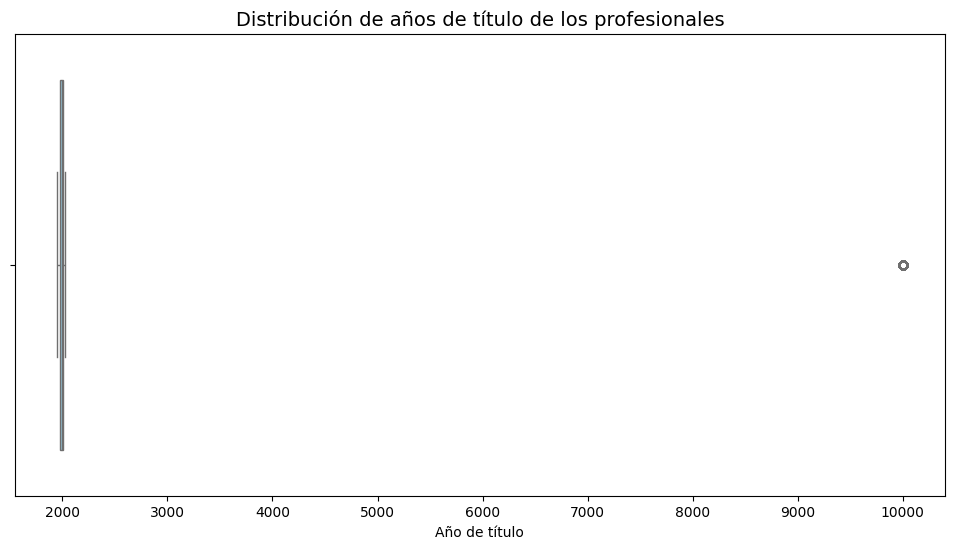

In [32]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df["año_titulo"], color="skyblue")
plt.title("Distribución de años de título de los profesionales", fontsize=14)
plt.xlabel("Año de título")
plt.show()

In [33]:
Q1 = df["año_titulo"].quantile(0.25)
Q3 = df["año_titulo"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Límite inferior:", lower_bound)
print("Límite superior:", upper_bound)

outliers = df[(df["año_titulo"] < lower_bound) | (df["año_titulo"] > upper_bound)]
outliers[["año_titulo", "institucion_formadora"]].head(10)

Q1: 1982.0
Q3: 2010.0
IQR: 28.0
Límite inferior: 1940.0
Límite superior: 2052.0


,año_titulo,institucion_formadora
44,9999,UNIVERSIDAD NACIONAL DEL NORDESTE
45,9999,UNIVERSIDAD NACIONAL DEL NORDESTE
46,9999,UNIVERSIDAD DE BUENOS AIRES
47,9999,UNIVERSIDAD DE BUENOS AIRES
2555,9999,UNIVERSIDAD DE GUAYAQUIL
3893,9999,UNIVERSIDAD DE BUENOS AIRES
3894,9999,UNIVERSIDAD NACIONAL DE ROSARIO
3895,9999,UNIVERSIDAD DE BUENOS AIRES
3896,9999,UNIVERSIDAD NACIONAL DE LA PLATA
3897,9999,UNIVERSIDAD DE BUENOS AIRES


In [34]:
outliers_instituciones = (
    outliers.groupby("institucion_formadora")["total"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

outliers_instituciones

,total
institucion_formadora,
UNIVERSIDAD DE BUENOS AIRES,2692
UNIVERSIDAD NACIONAL DEL LITORAL,1845
UNIVERSIDAD NACIONAL DE CORDOBA,1518
UNIVERSIDAD NACIONAL DE LA PLATA,725
Sin Datos,662
UNIVERSIDAD NACIONAL DEL NORDESTE,421
UNIVERSIDAD NACIONAL DE ASUNCION,90
UNIVERSIDAD CATOLICA DE CORDOBA,60
UNIVERSIDAD NACIONAL DE ROSARIO,41


El boxplot salió “aplastado” en el eje X aparecen valores anómalos como 10.000 (seguramente errores de carga en año_titulo). Eso estira toda la escala y hace que la distribución real quede ilegible.

Procedo a corregirlo;

In [35]:
df_filtrado = df[(df["año_titulo"] >= 1950) & (df["año_titulo"] <= 2025)]

print("Rango de años de título:", df_filtrado["año_titulo"].min(), "-", df_filtrado["año_titulo"].max())

Rango de años de título: 1950 - 2021


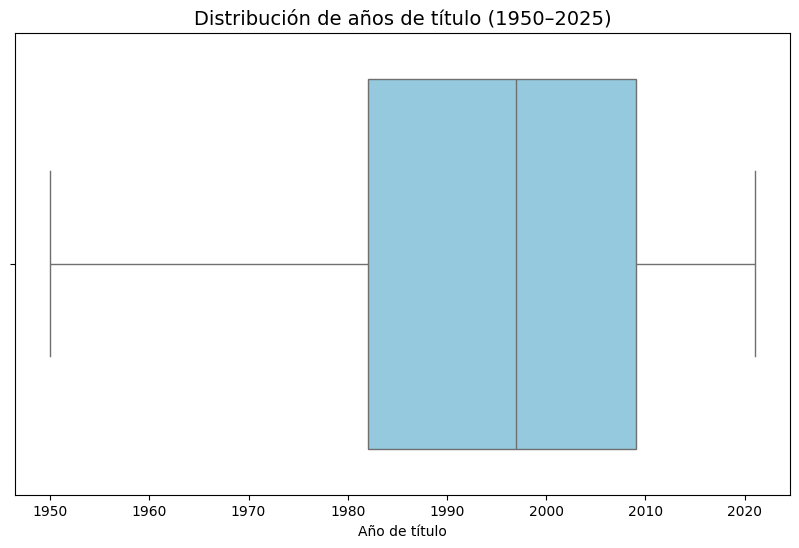

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x=df_filtrado["año_titulo"],
    color="skyblue",
    fliersize=3   # tamaño de los outliers
)
plt.title("Distribución de años de título (1950–2025)", fontsize=14)
plt.xlabel("Año de título")
plt.show()

# Conclusiones preliminares – Primera Entrega

### 1. Nacionales vs. Extranjeros
- La gran mayoría de los profesionales en Argentina son **NACIONALES**, aunque se observa una proporción no despreciable de **EXTRANJEROS**.  
- Algunas provincias dependen más de médicos extranjeros, en especial aquellas con menor densidad de médicos locales o zonas de frontera.  

### 2. Evolución temporal
- Entre 2012 y 2021, la **proporción de médicos extranjeros** se mantiene relativamente estable, con pequeñas variaciones.  
- No se evidencia un crecimiento abrupto, pero sí un **aporte sostenido de profesionales extranjeros**.  


### 3. Distribución etaria
- Los **NACIONALES** presentan una distribución más homogénea en los distintos grupos etarios.  
- Los **EXTRANJERAS** tienden a concentrarse en adultos jóvenes, lo que sugiere una **migración profesional en etapas tempranas de la carrera**.  


### 4. Instituciones formadoras
- La **Universidad de Buenos Aires (UBA)** concentra, por amplio margen, la mayor cantidad de médicos en el país.  
- Dentro del Top 10 de instituciones formadoras, los **extranjeros también están presentes**, aunque en menor proporción que los nacionales.  


### 5. Años de titulación (análisis IQR)
- Se detectaron **valores atípicos** en `año_titulo` (ej. registros con valores irreales como 10.000), lo que evidencia errores de carga en el dataset.  
- Tras filtrar, se observa que la mayoría de los títulos se concentran entre finales del siglo XX y principios del XXI.  


 ##  Conclusión general
Este primer análisis permite confirmar que:  
1. Argentina cuenta con un sistema de salud **mayoritariamente nacional**, pero con un **aporte sostenido de médicos extranjeros**.  
2. La participación extranjera es más relevante en ciertas provincias y grupos etarios jóvenes.  
3. Las **universidades públicas**, especialmente la UBA, son claves en la formación de profesionales médicos.  
4. Existen **inconsistencias en los datos** (años de titulación fuera de rango) que deben depurarse en futuras etapas.  


## Próximos pasos sugeridos
- Ampliar el análisis comparando con **datos de otro país de referencia en salud**.  
- Explorar modelos que permitan proyectar la **oferta y demanda futura de médicos**.  
- Realizar cruces adicionales (ej. provincia vs institución formadora, sexo vs origen, etc.) para enriquecer las conclusiones.  